In [93]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas
from datetime import datetime, timedelta
data = pandas.read_csv('owid-covid-data.csv')

In [94]:
data.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,tests_units
0,ABW,Aruba,2020-03-13,2,2,0,0,18.733,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,2020-03-20,4,2,0,0,37.465,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,2020-03-24,12,8,0,0,112.395,74.930,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,2020-03-25,17,5,0,0,159.227,46.831,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,2020-03-26,19,2,0,0,177.959,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [95]:
s = data['date'][0]
type(s)

str

In [96]:
for i in range(len(data['date'])):
    data['date'][i] =  datetime.strptime(data['date'][i], "%Y-%m-%d").date()

C:\Users\zelen\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [97]:
df = data[data['location'] =='Russia']
df = df[df['date'] >= datetime.strptime('2020-03-03', "%Y-%m-%d").date()]
df2 = df[df.columns[2:5]]

In [98]:
df

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,tests_units
12000,RUS,Russia,2020-03-03,3,1,0,0,0.021,0.007,0.000,0.000,NaN,NaN,NaN,NaN,NaN
12001,RUS,Russia,2020-03-04,4,1,0,0,0.027,0.007,0.000,0.000,NaN,NaN,NaN,NaN,NaN
12002,RUS,Russia,2020-03-05,4,0,0,0,0.027,0.000,0.000,0.000,46414.0,NaN,0.318,NaN,tests performed
12003,RUS,Russia,2020-03-06,4,0,0,0,0.027,0.000,0.000,0.000,51366.0,4952.0,0.352,0.034,tests performed
12004,RUS,Russia,2020-03-07,10,6,0,0,0.069,0.041,0.000,0.000,55688.0,4322.0,0.382,0.030,tests performed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12057,RUS,Russia,2020-04-29,93558,6411,867,72,641.096,43.931,5.941,0.493,3303717.0,164459.0,22.638,1.127,tests performed
12058,RUS,Russia,2020-04-30,99399,5841,972,105,681.121,40.025,6.661,0.720,3498308.0,194591.0,23.972,1.333,tests performed
12059,RUS,Russia,2020-05-01,106498,7099,1073,101,729.766,48.645,7.353,0.692,3723807.0,225499.0,25.517,1.545,tests performed
12060,RUS,Russia,2020-05-02,114431,7933,1169,96,784.126,54.360,8.010,0.658,3945518.0,221711.0,27.036,1.519,tests performed


In [99]:
df2['day'] = (df2['date'] - datetime.strptime('2020-03-02', "%Y-%m-%d").date())/timedelta(days=1)

C:\Users\zelen\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [100]:
df2 = df2[df2.columns[1:]]

In [101]:
df2.head()

,total_cases,new_cases,day
12000,3,1,1.0
12001,4,1,2.0
12002,4,0,3.0
12003,4,0,4.0
12004,10,6,5.0


In [102]:
for i in range(len(df2['new_cases'])):
    if (df2['new_cases'][12000+i] == 0):
        df2['new_cases'][12000+i] = 1

C:\Users\zelen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


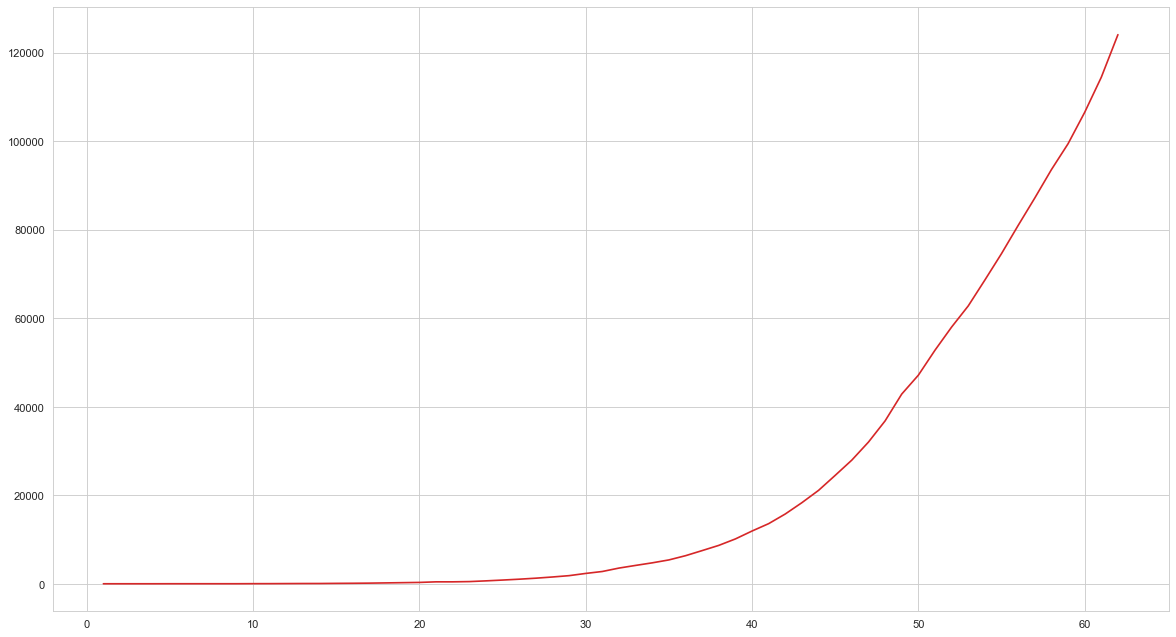

In [103]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(18, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.plot('day', 'total_cases', data=df2, color='tab:red')

In [104]:
xday = np.array(range(len(df2['day'])))

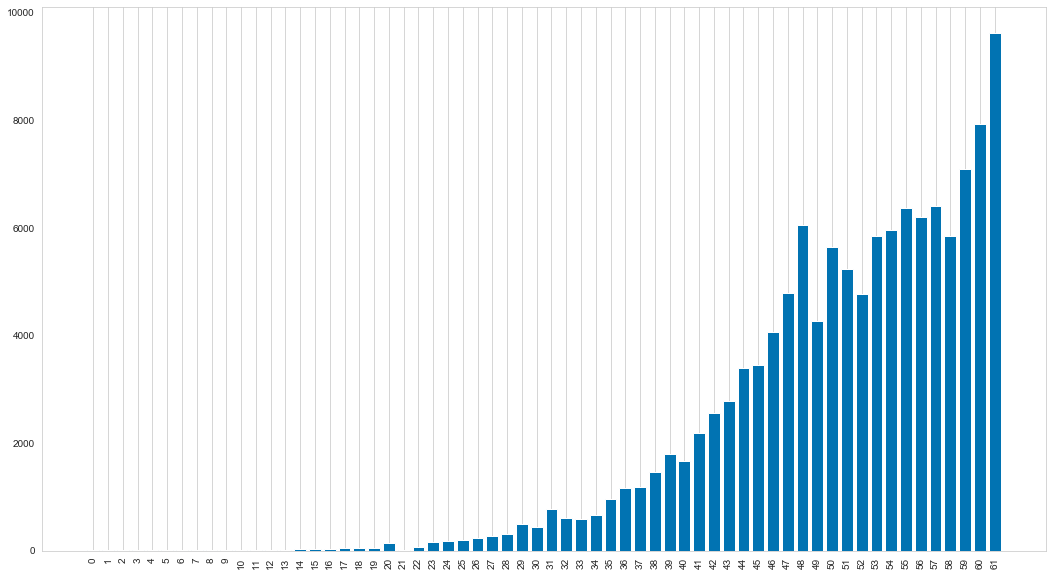

In [105]:
plt.figure(figsize=(18, 10))
plt.grid(axis='y')
plt.bar(xday, df2['new_cases'])
plt.xticks(ticks=range(len(xday)), rotation=90)
plt.show()

In [106]:
import math

df2['log_total_cases'] = df2['day']
df2['log_new_cases'] = df2['day']
for i in range(len(df2['new_cases'])):
    df2['log_total_cases'][12000+i] = math.log(df2['total_cases'][12000+i])
    df2['log_new_cases'][12000+i] = math.log(df2['new_cases'][12000+i])

C:\Users\zelen\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\zelen\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [107]:
df2

,total_cases,new_cases,day,log_total_cases,log_new_cases
12000,3,1,1.0,1.098612,0.000000
12001,4,1,2.0,1.386294,0.000000
12002,4,1,3.0,1.386294,0.000000
12003,4,1,4.0,1.386294,0.000000
12004,10,6,5.0,2.302585,1.791759
...,...,...,...,...,...
12057,93558,6411,58.0,11.446337,8.765771
12058,99399,5841,59.0,11.506897,8.672657
12059,106498,7099,60.0,11.575881,8.867709
12060,114431,7933,61.0,11.647727,8.978787


In [108]:
X_train = df2[0:50]
X_test = df2[50:]

In [109]:
Y_train_total = np.array(X_train['log_total_cases'][:])
Y_train_new = np.array(X_train['log_new_cases'][:])
X_train = np.array(X_train['day'][:])

In [110]:
Y_test_total = np.array(X_test['log_total_cases'][:])
Y_test_new = np.array(X_test['log_new_cases'][:])
X_test = np.array(X_test['day'][:])

## Накопительно

In [111]:
X_train = X_train.reshape(-1, 1)
model_total = LinearRegression()
cur_model = model_total.fit(X_train, Y_train_total)
w10, w00 = model_total.coef_[0], model_total.intercept_
w10, w00

(0.20328037440019606, 1.2756761950773976)

In [112]:
r_sq = model_total.score(X_train, Y_train_total)
print('coefficient of determination:', r_sq)
print('intercept:', model_total.intercept_)
print('slope:', model_total.coef_)


coefficient of determination: 0.9852565856298344
intercept: 1.2756761950773976
slope: [0.20328037]


In [113]:
xs = np.arange(0, 62, 0.01)
ys = cur_model.predict(xs.reshape(-1, 1))

In [114]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_palette("colorblind")
palette = sns.color_palette()
figsize = (15,8)
legend_fontsize = 16

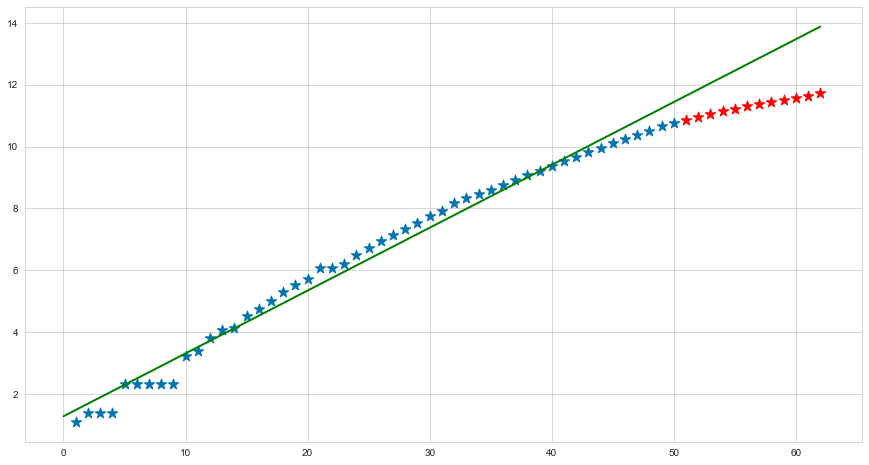

In [115]:
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.scatter(X_train, Y_train_total, marker='*', s=120)
ax.scatter(X_test, Y_test_total, marker='*', s=120, c='red')
ax.plot(xs, ys, linewidth=2, c='green')

In [116]:
y_total_exp = np.exp(w10 * xs + w00)

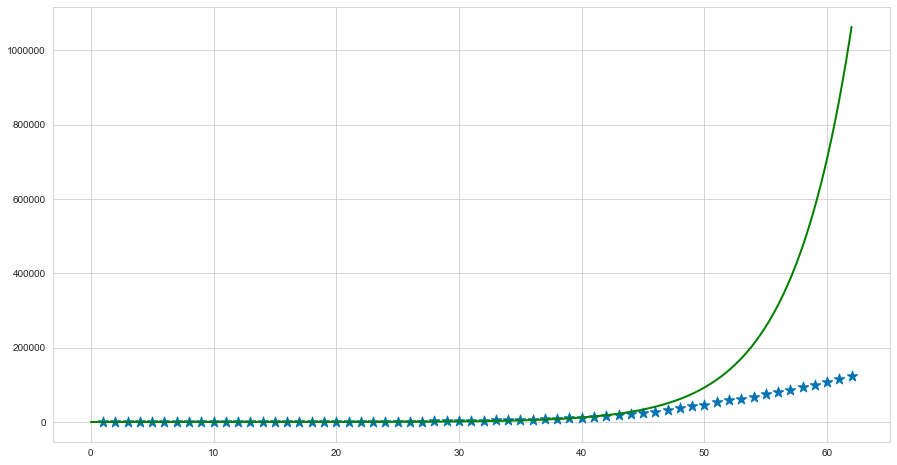

In [117]:
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.scatter(df2['day'], df2['total_cases'], marker='*', s=120)
ax.plot(xs, y_total_exp, linewidth=2, c='green')

Из графика видно, что на тестовых данных(после 50) модель односторонне завышает результат, то есть экспонента плохо описывает данную зависимость.

## Ежедневно

In [118]:
model_new = LinearRegression()
new_model = model_new.fit(X_train.reshape(-1, 1), Y_train_new)
w1, w0 = model_new.coef_[0], model_new.intercept_

In [119]:
r_sq = model_new.score(X_train.reshape(-1, 1), Y_train_new)
print('coefficient of determination:', r_sq)
print('intercept:', model_new.intercept_)
print('slope:', model_new.coef_)

coefficient of determination: 0.9168804631957729
intercept: -0.2557037002763103
slope: [0.19112937]


In [120]:
xs_new = np.arange(0, 62, 0.01)
ys_new = new_model.predict(xs.reshape(-1, 1))

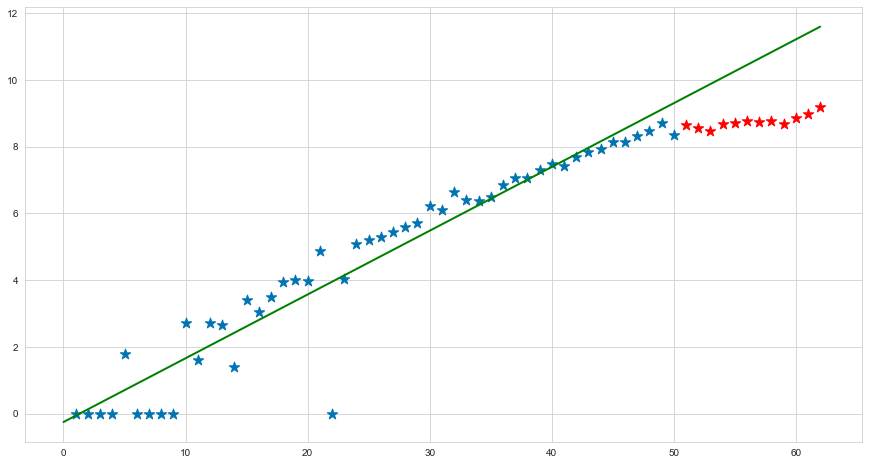

In [121]:
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.scatter(X_train, Y_train_new, marker='*', s=120)
ax.scatter(X_test, Y_test_new, marker='*', s=120, c='red')
ax.plot(xs_new, ys_new, linewidth=2, c='green')

In [122]:
y_new_exp = np.exp(w1 * xs_new + w0)

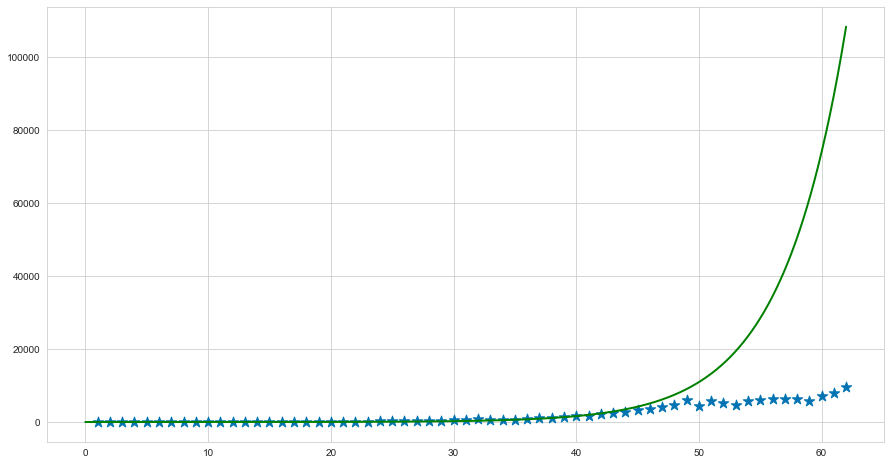

In [123]:
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.scatter(df2['day'], df2['new_cases'], marker='*', s=120)
ax.plot(xs_new, y_new_exp, linewidth=2, c='green')

Из графика видно, что на тестовых данных(после 50) модель односторонне завышает результат, то есть экспонента плохо описывает данную зависимость.

In [124]:
from scipy.stats import multivariate_normal

# create data
N = 250
xs = np.linspace(0, 50, N)
X = np.linspace(-10, 10, N)
Y = np.linspace(-10, 10, N)
X, Y = np.meshgrid(X, Y)

pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

def myplot_heatmap(Z):
    # Make the plot
    plt.axis('equal')
    plt.xlim((-1, 3))
    plt.ylim((-1, 1))
    plt.pcolormesh(X, Y, Z, cmap=plt.cm.jet)
    plt.show()

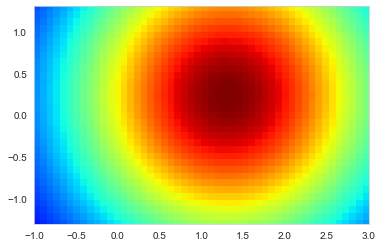

In [125]:
priot_mu, prior_sigma = np.array([w00, w10]), 2*np.array([[1, 0], [0, 1]])

cur_mu, cur_sigma = priot_mu.copy(), prior_sigma.copy()

Z = multivariate_normal.pdf(pos, mean=cur_mu, cov=cur_sigma)
myplot_heatmap(Z)

In [126]:
def myplot_sample_lines(mu, sigma, n=20, points=None):
    # Посэмплируем и порисуем прямые
    my_w = np.random.multivariate_normal(mu, sigma, n)
    for w in my_w:
        plt.plot(xs, np.exp(w[0] + w[1]*xs), 'k-', lw=.4)
    plt.ylim((0, 100000))
    plt.xlim((0, 50))
    if not points is None:
        plt.scatter(points[0], points[1], marker='*', s=200)
    plt.show()

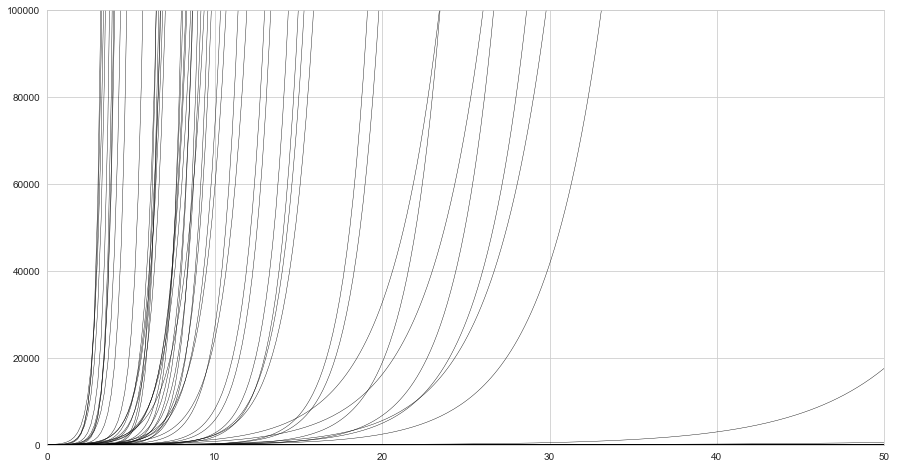

In [127]:
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
myplot_sample_lines(cur_mu, cur_sigma, 100)

In [128]:
def bayesian_update(mu, sigma, x, y, sigma_noise):
    x_matrix = np.array([[1, x]])
    sigma_n = np.linalg.inv(np.linalg.inv(sigma)+ (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), x_matrix) )
    mu_n = np.matmul(sigma_n, np.matmul(np.linalg.inv(sigma), np.transpose(mu)) + (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), np.array([y]) ) )
    return mu_n, sigma_n

In [129]:
xtrain = np.array(range(50))+1

In [130]:
sigma_noise = np.std(cur_model.predict(X_train.reshape(-1, 1)) - Y_train_total)

for i in range(len(xtrain)):
    px, py = xtrain[i], Y_train_total[i]
    cur_mu, cur_sigma = bayesian_update(cur_mu, cur_sigma, px, py, sigma_noise)

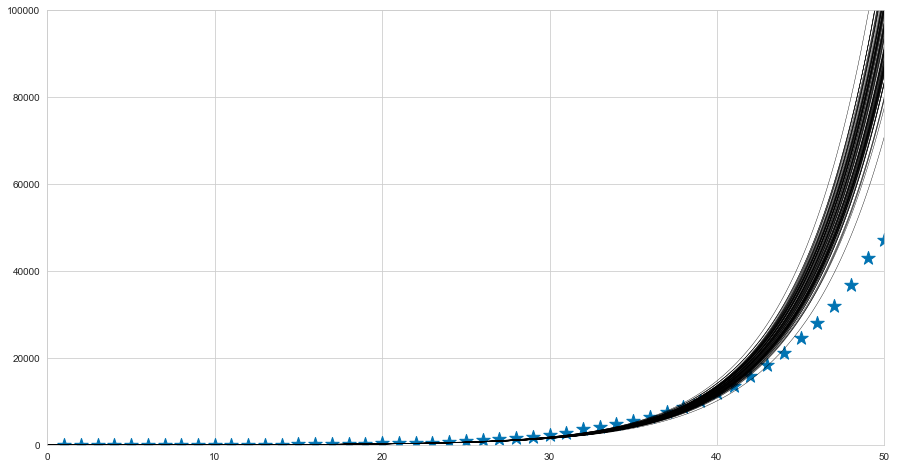

In [131]:
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
myplot_sample_lines(cur_mu, cur_sigma, 100, points=[df2['day'], df2['total_cases']])

In [132]:
w_0, w_1 = cur_mu

C:\Users\zelen\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Saw kwargs ['lw', 'linewidth'] which are all aliases for 'linewidth'.  Kept value from 'linewidth'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  from ipykernel import kernelapp as app


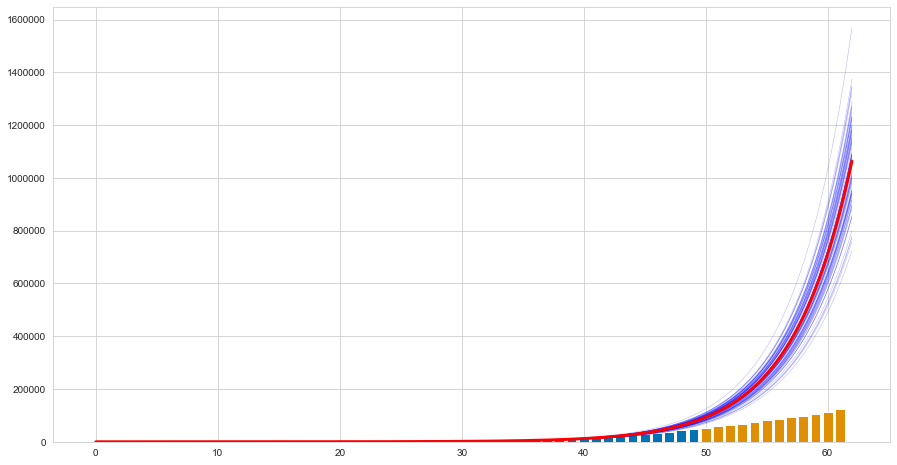

In [133]:
xs_new_train = np.arange(0, 50, 0.01)
xs_new_test = np.arange(50, 62, 0.01)
xs_all = np.arange(0, 62, 0.01)

y_total_pred = np.exp(w_1 * xs_all + w_0)
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)

plt.bar(np.arange(0, 50, 1), df2['total_cases'][0:50])
plt.bar(np.arange(50, 62, 1), df2['total_cases'][50:])

for w0_sample, w1_sample in np.random.multivariate_normal(cur_mu, cur_sigma, 80):
    plt.plot(xs_all, [np.exp(x * w1_sample + w0_sample)  for x in xs_all], color = 'blue', lw=.5, alpha=.3)

ax.plot(xs_all, y_total_pred, linewidth=3, c='red', lw=1, alpha=1)

In [134]:
n1 = (datetime.strptime('2020-05-01', "%Y-%m-%d").date() - datetime.strptime('2020-03-02', "%Y-%m-%d").date())/timedelta(days=1)
n2 = (datetime.strptime('2020-06-01', "%Y-%m-%d").date() - datetime.strptime('2020-03-02', "%Y-%m-%d").date())/timedelta(days=1)
n3 = (datetime.strptime('2020-09-01', "%Y-%m-%d").date() - datetime.strptime('2020-03-02', "%Y-%m-%d").date())/timedelta(days=1)

Число заболевших к 1 мая:

In [135]:
np.exp(w_1 * n1 + w_0)

709629.7677139628

Число заболевших к 1 июня:

In [136]:
np.exp(w_1 * n2 + w_0)

387098703.19676733

Число заболевших к 1 сентября:

In [137]:
np.exp(w_1 * n3 + w_0)

5.127525696243379e+16

# Сигмоида

Плотность распределения psi(x) = dF(x)/dx = exp(a*x^2 + b*x + c), ответ y(x) ~ psi(x), потому ln(y_i) = a*x^2 + b*x + c, где y_i - это ежедневное количество заболевших (не накопительно)

In [138]:
x_train = np.arange(1, 51, 1)
x_sigm = np.vstack([x_train**i for i in range(1, 3)]).transpose()

In [139]:
sigma_model = LinearRegression()
cur_model_sigm = sigma_model.fit(x_sigm[:], Y_train_new)
w20, w10, w00 = sigma_model.coef_[1],sigma_model.coef_[0], sigma_model.intercept_
w20, w10, w00

(-0.0014019694828364504, 0.26262981096340504, -0.8753742116900227)

In [140]:
xs_new_sigma = np.arange(0, 62, 0.01)
xs_new_sigma_1 = np.vstack([xs_new_sigma**i for i in range(1, 3)]).transpose()
ys_new_sigma = sigma_model.predict(xs_new_sigma_1)

In [141]:
ys_new_sigma

array([-0.87537421, -0.87274805, -0.87012218, ..., 10.01583855,
       10.0167271 , 10.01761538])

In [142]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_palette("colorblind")
palette = sns.color_palette()
figsize = (15,8)
legend_fontsize = 16

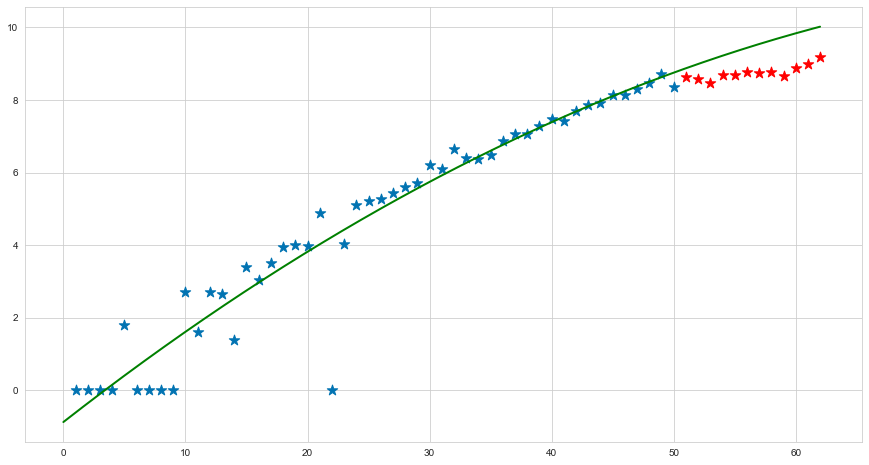

In [143]:
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.scatter(X_train, Y_train_new, marker='*', s=120)
ax.scatter(X_test, Y_test_new, marker='*', s=120, c='red')
ax.plot(xs_new_sigma, ys_new_sigma, linewidth=2, c='green')

In [144]:
y_new_exp = np.exp(w20 * (xs_new_sigma**2) + w10 *xs_new_sigma + w00)

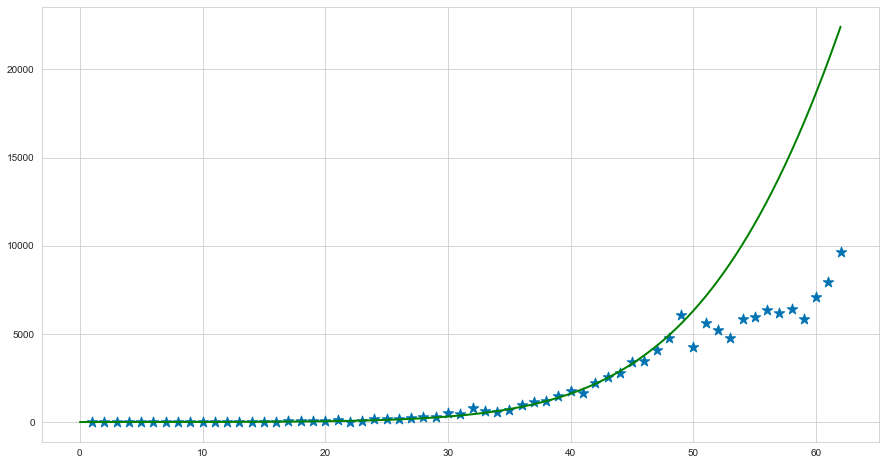

In [145]:
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.scatter(df2['day'], df2['new_cases'], marker='*', s=120)
ax.plot(xs_new_sigma, y_new_exp, linewidth=2, c='green')

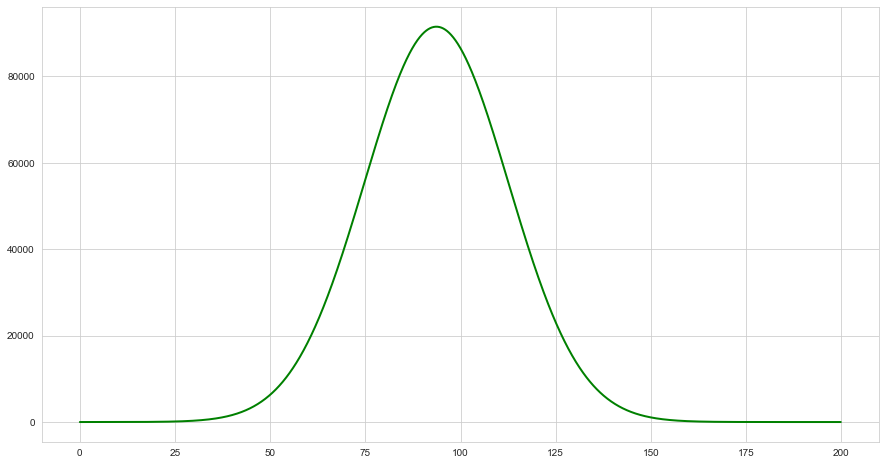

In [146]:
xs_new_sigma_all = np.arange(0, 200, 0.1)
y_predict = np.exp(w20 * (xs_new_sigma_all**2) + w10 *xs_new_sigma_all + w00)
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.plot(xs_new_sigma_all, y_predict, linewidth=2, c='green')

# Построим накопительный график (в виде сигмоиды)

In [147]:
xs_new_sigma_all = np.arange(0, 200, 1.0)
y_predict = np.exp(w20 * (xs_new_sigma_all**2) + w10 *xs_new_sigma_all + w00)

In [148]:
y_predict_sum = []
y_predict_sum.append(y_predict[0])
for i in range(1, len(y_predict)):
    y_predict_sum.append(y_predict[i]+y_predict_sum[i-1])

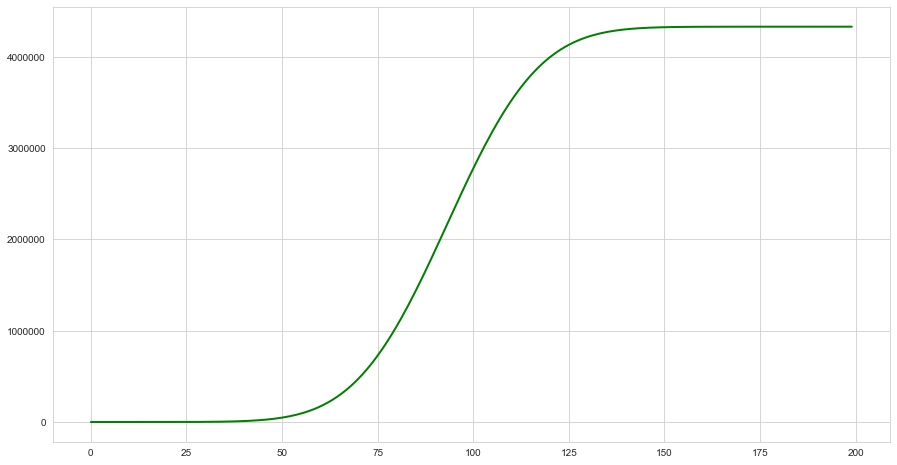

In [149]:
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.plot(xs_new_sigma_all, y_predict_sum, linewidth=2, c='green')

In [150]:
N = 250
xs = np.linspace(0, 50, N)
X = np.linspace(-10, 10, N)
Y = np.linspace(-10, 10, N)
Z = np.linspace(-10, 10, N)
X, Y, Z = np.meshgrid(X, Y, Z)

pos = np.empty(X.shape + (3,))
pos[:, :, :, 0] = X
pos[:, :, :, 1] = Y
pos[:, :, :, 2] = Z

In [151]:
priot_mu, prior_sigma = np.array([w00, w10, w20]), 2*np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])

cur_mu, cur_sigma = priot_mu.copy(), prior_sigma.copy()

ZZ = multivariate_normal.pdf(pos, mean=cur_mu, cov=cur_sigma)


In [152]:
def myplot_sample_lines(mu, sigma, n=20, points=None):
    # Посэмплируем и порисуем прямые
    my_w = np.random.multivariate_normal(mu, sigma, n)
    for w in my_w:
        plt.plot(xs, np.exp(w[0] + w[1]*xs + w[2]*xs*xs), 'k-', lw=.4)
    plt.ylim((0, 5000))
    plt.xlim((0, 50))
    if not points is None:
        plt.scatter(points[0], points[1], marker='*', s=200)
    plt.show()

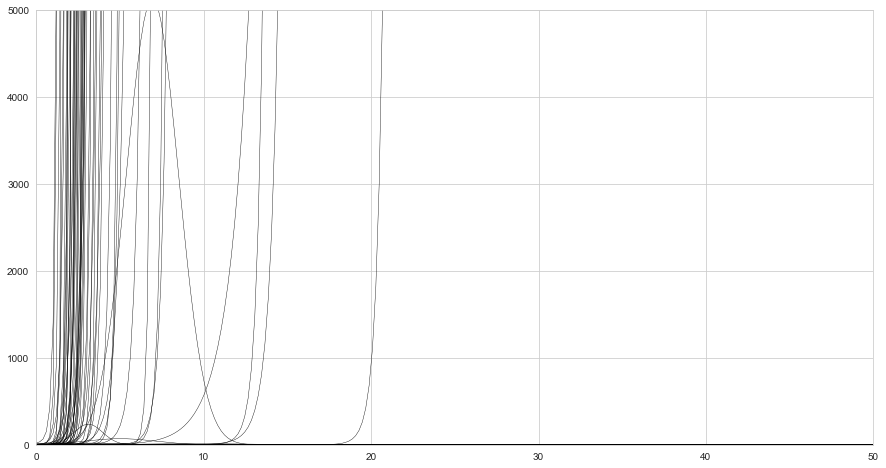

In [153]:
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
myplot_sample_lines(cur_mu, cur_sigma, 100)

In [154]:
def bayesian_update(mu, sigma, x,x2, y, sigma_noise):
    x_matrix = np.array([[1, x, x2]])
    sigma_n = np.linalg.inv(np.linalg.inv(sigma)+ (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), x_matrix) )
    mu_n = np.matmul(sigma_n, np.matmul(np.linalg.inv(sigma), np.transpose(mu)) + (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), np.array([y]) ) )
    return mu_n, sigma_n

In [155]:
xtrain = x_sigm

In [156]:
sigma_noise = np.std(cur_model_sigm.predict(xtrain) - Y_train_new)



In [157]:
for i in range(len(Y_train_new)):
    px, px2, py = xtrain[i,0],xtrain[i,1], Y_train_new[i]
    cur_mu, cur_sigma = bayesian_update(cur_mu, cur_sigma, px,px2, py, sigma_noise)

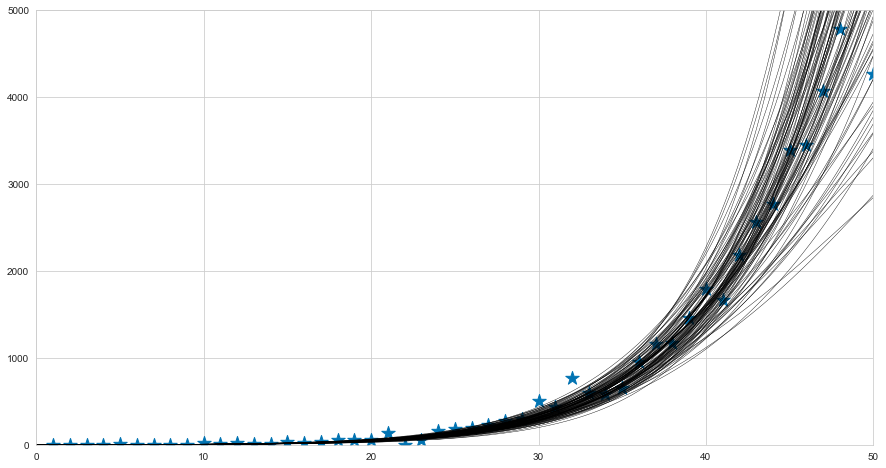

In [158]:
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
myplot_sample_lines(cur_mu, cur_sigma, 100, points=[df2['day'], df2['new_cases']])

In [159]:
w_0, w_1, w_2 = cur_mu

C:\Users\zelen\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Saw kwargs ['lw', 'linewidth'] which are all aliases for 'linewidth'.  Kept value from 'linewidth'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  from ipykernel import kernelapp as app


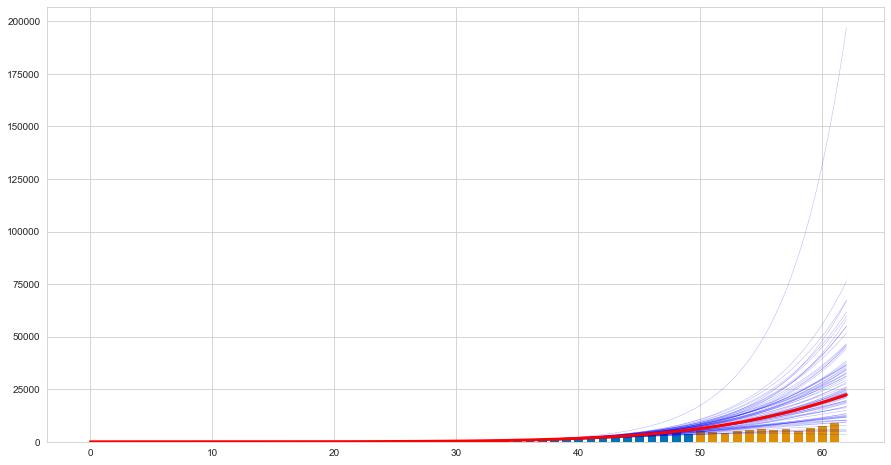

In [160]:
xs_new_train = np.arange(0, 50, 0.01)
xs_new_test = np.arange(50, 62, 0.01)
xs_all = np.arange(0, 62, 0.01)

y_new_pred = np.exp(w_1 * xs_all +w_2*xs_all*xs_all + w_0)
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)

plt.bar(np.arange(0, 50, 1), df2['new_cases'][0:50])
plt.bar(np.arange(50, 62, 1), df2['new_cases'][50:])

for w0_sample, w1_sample, w2_sample in np.random.multivariate_normal(cur_mu, cur_sigma, 80):
    plt.plot(xs_all, [np.exp(x * w1_sample + x*x*w2_sample + w0_sample)  for x in xs_all], color = 'blue', lw=.5, alpha=.3)

ax.plot(xs_all, y_new_pred, linewidth=3, c='red', lw=1, alpha=1)

C:\Users\zelen\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Saw kwargs ['lw', 'linewidth'] which are all aliases for 'linewidth'.  Kept value from 'linewidth'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  


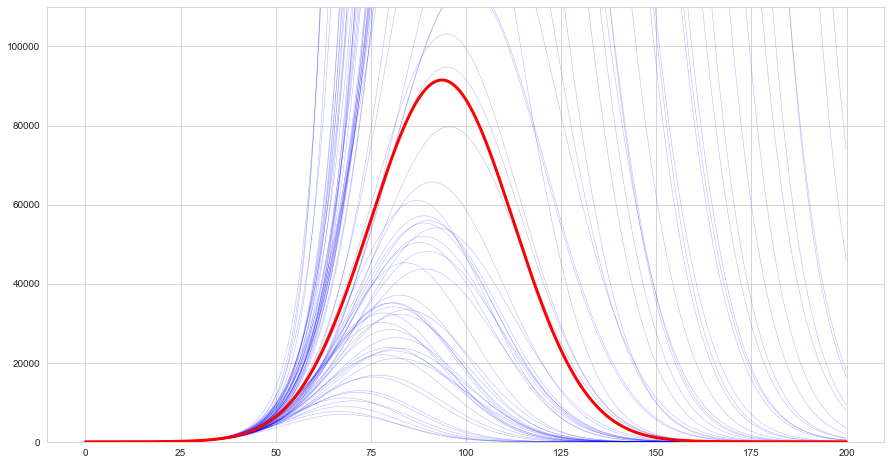

In [161]:
xs_new_train = np.arange(0, 50, 0.01)
xs_new_test = np.arange(50, 62, 0.01)
xs_all = np.arange(0, 200, 0.1)

y_new_pred = np.exp(w_1 * xs_all +w_2*xs_all*xs_all + w_0)
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)

plt.ylim(top=1.1e5)

for w0_sample, w1_sample, w2_sample in np.random.multivariate_normal(cur_mu, cur_sigma, 80):
    plt.plot(xs_all, [np.exp(x * w1_sample + x*x*w2_sample + w0_sample)  for x in xs_all], color = 'blue', lw=.5, alpha=.3)

ax.plot(xs_all, y_new_pred, linewidth=3, c='red', lw=1, alpha=1)


Построим накопительное число заболевших

C:\Users\zelen\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Saw kwargs ['lw', 'linewidth'] which are all aliases for 'linewidth'.  Kept value from 'linewidth'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.


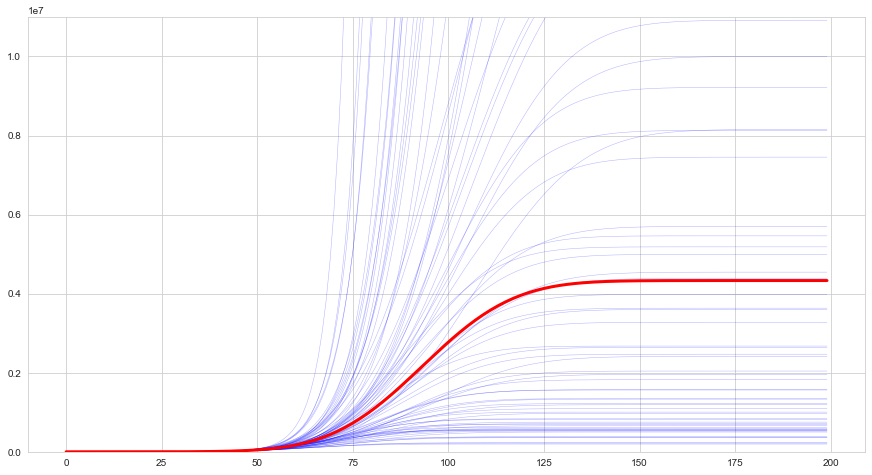

In [162]:
xs_all = np.arange(0, 200, 1.0)

y_new_pred_for_sum = np.exp(w_1 * xs_all +w_2*xs_all*xs_all + w_0)
y_predict_sum = []
y_predict_sum.append(y_new_pred_for_sum[0])
for i in range(1, len(y_new_pred_for_sum)):
    y_predict_sum.append(y_new_pred_for_sum[i]+y_predict_sum[i-1])

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)

plt.ylim(top=1.1e7)

itog = []

for w0_sample, w1_sample, w2_sample in np.random.multivariate_normal(cur_mu, cur_sigma, 80):
    yy = np.exp(w1_sample * xs_all +w2_sample*xs_all*xs_all + w0_sample)
    y_sample = []
    y_sample.append(yy[0])
    for i in range(1, len(yy)):
        y_sample.append(yy[i]+y_sample[i-1])
    plt.plot(xs_all, y_sample, color = 'blue', lw=.5, alpha=.3)
    itog.append(y_sample[199])

ax.plot(xs_all, y_predict_sum, linewidth=3, c='red', lw=1, alpha=1)

{'whiskers': [<matplotlib.lines.Line2D at 0x1c6425b7888>,
 'caps': [<matplotlib.lines.Line2D at 0x1c6425b7f08>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c642557308>],
 'medians': [<matplotlib.lines.Line2D at 0x1c6425bae88>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c6425baf88>],
 'means': []}

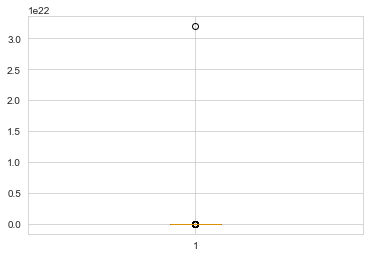

In [163]:
plt.boxplot(itog)

In [164]:
np.percentile(itog, 90)

5074834357.619732

In [165]:
np.percentile(itog, 10)

540243.715330616

In [166]:
np.percentile(itog, 50)

4186331.277443598

Задание 5

По имеющимся данным сигмоида лучше описывает данные чем экспонента, мы видим более реалистичные итоговые данные и меньшее отклонение от тестовых данных. Однако сигмоида не учитывает факты, которые могут влиять на изменение динамики (таких как степень карантинных мер принятых государством). По графику видно, что по оптимистичным прогнозам заболеет почти 540 тыс.человек, а писсимистичный - заболеет вся страна, думаю исходя из данных результатов можно принимать решение о введении карантина, но так-же необходимо оценить степень влияния карантина на экономику страны и уровень жизни, чтоб не получилось что из-за жестких мер люди будут погибать(недостаток средств на проживания и других каких-то факторов). Вывод такой - карантин необходим, но степень его надо рассчитывать.